In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import (StandardScaler
                                  ,RobustScaler
                                  ,MinMaxScaler
                                  ,OrdinalEncoder
                                  ,OneHotEncoder
                                  ,LabelEncoder
                                  )
from sklearn.impute import SimpleImputer,KNNImputer

In [2]:
df = pd.read_csv(r'C:\Users\georg\Desktop\Bstorm Visual studio code\01 - Python_Full_Course\07_Machine_learning\Exercice ML-DM\3. stroke\data\stroke.csv',index_col='id')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
df_clean_sk = df.copy()
df_clean_pd = df.copy()


### Imputation 

In [5]:
imputer = SimpleImputer(strategy='mean')
df_clean_sk['bmi'] = imputer.fit_transform(df_clean_sk[['bmi']])
df_clean_sk['bmi'] = df_clean_sk['bmi'].round(2)
df_clean_sk['bmi']

id
9046     36.60
51676    28.89
31112    32.50
60182    34.40
1665     24.00
         ...  
18234    28.89
44873    40.00
19723    30.60
37544    25.60
44679    26.20
Name: bmi, Length: 5110, dtype: float64

In [120]:
df_clean_pd['bmi'] = df_clean_pd['bmi'].fillna(df_clean_pd['bmi'].mean())
df_clean_pd['bmi']

id
9046     36.600000
51676    28.893237
31112    32.500000
60182    34.400000
1665     24.000000
           ...    
18234    28.893237
44873    40.000000
19723    30.600000
37544    25.600000
44679    26.200000
Name: bmi, Length: 5110, dtype: float64

In [121]:
df_clean_sk.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Scaling

In [6]:
minmaxscaler = MinMaxScaler()
df_clean_sk['age'] = minmaxscaler.fit_transform(df_clean_sk[['age']])
df_clean_sk['age']

id
9046     0.816895
51676    0.743652
31112    0.975586
60182    0.597168
1665     0.963379
           ...   
18234    0.975586
44873    0.987793
19723    0.426270
37544    0.621582
44679    0.536133
Name: age, Length: 5110, dtype: float64

In [7]:
stscaler = StandardScaler()
df_clean_sk['bmi'] = stscaler.fit_transform(df_clean_sk[['bmi']])
df_clean_sk['bmi']

id
9046     1.001251
51676   -0.000404
31112    0.468594
60182    0.715435
1665    -0.635695
           ...   
18234   -0.000404
44873    1.442966
19723    0.221753
37544   -0.427829
44679   -0.349879
Name: bmi, Length: 5110, dtype: float64

In [8]:
rbscaler = RobustScaler()
df_clean_sk['avg_glucose_level'] = rbscaler.fit_transform(df_clean_sk[['avg_glucose_level']])
df_clean_sk['avg_glucose_level']

id
9046     3.712987
51676    2.994300
31112    0.380920
60182    2.153481
1665     2.231917
           ...   
18234   -0.220790
44873    0.904193
19723   -0.241417
37544    2.019406
44679   -0.179264
Name: avg_glucose_level, Length: 5110, dtype: float64

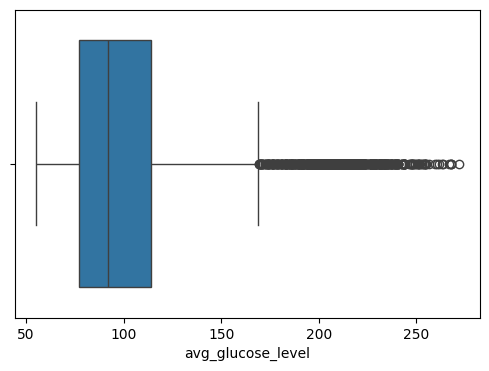

In [125]:
plt.figure(figsize=(6,4))
sns.boxplot(data= df,x='avg_glucose_level')
plt.show()

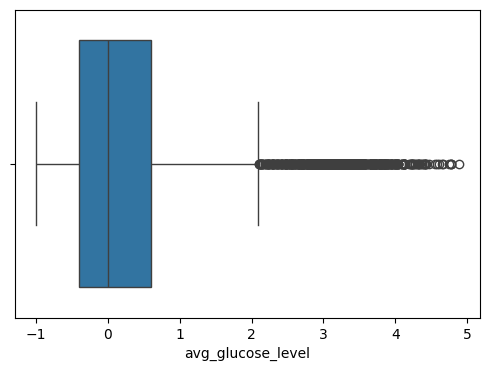

In [126]:
plt.figure(figsize=(6,4))
sns.boxplot(data= df_clean_sk,x='avg_glucose_level')
plt.show()

### Encodage

In [127]:
df_clean_pd['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [128]:
gender_dict = {'Male':0,
               'Female':1,
               'Other':-1}

df_clean_pd['gender'] = df_clean_pd['gender'].map(gender_dict)
df_clean_pd['gender'].value_counts()

gender
 1    2994
 0    2115
-1       1
Name: count, dtype: int64

In [129]:
df_clean_pd.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [130]:
df_clean_sk['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [131]:
df_clean_sk['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [9]:
Oencoder = OrdinalEncoder(categories=[['children','Private','Self-employed','Govt_job']]
                          ,handle_unknown='use_encoded_value'
                          ,unknown_value=-1)
df_clean_sk['work_type'] = Oencoder.fit_transform(df_clean_sk[['work_type']])
df_clean_sk['work_type'].value_counts()

work_type
 1.0    2925
 2.0     819
 0.0     687
 3.0     657
-1.0      22
Name: count, dtype: int64

In [10]:
df_clean_sk = pd.get_dummies(data=df_clean_sk,columns=['smoking_status'],drop_first=True)

In [134]:
df_clean_sk.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,
9046,Male,0.816895,0,1,Yes,1.0,Urban,3.712987,1.001251,1,True,False,False
51676,Female,0.743652,0,0,Yes,2.0,Rural,2.994300,-0.000404,1,False,True,False
31112,Male,0.975586,0,1,Yes,1.0,Rural,0.380920,0.468594,1,False,True,False
60182,Female,0.597168,0,0,Yes,1.0,Urban,2.153481,0.715435,1,False,False,True
1665,Female,0.963379,1,0,Yes,2.0,Rural,2.231917,-0.635695,1,False,True,False


In [11]:
df_clean_sk = pd.get_dummies(data=df_clean_sk,
                             columns=['gender','ever_married','Residence_type'],
                             drop_first=True)

In [12]:
df_clean_sk

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Male,gender_Other,ever_married_Yes,Residence_type_Urban
id,,,,,,,,,,,,,,
9046,0.816895,0,1,1.0,3.712987,1.001251,1,True,False,False,True,False,True,True
51676,0.743652,0,0,2.0,2.994300,-0.000404,1,False,True,False,False,False,True,False
31112,0.975586,0,1,1.0,0.380920,0.468594,1,False,True,False,True,False,True,False
60182,0.597168,0,0,1.0,2.153481,0.715435,1,False,False,True,False,False,True,True
1665,0.963379,1,0,2.0,2.231917,-0.635695,1,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18234,0.975586,1,0,1.0,-0.220790,-0.000404,0,False,True,False,False,False,True,True
44873,0.987793,0,0,2.0,0.904193,1.442966,0,False,True,False,False,False,True,True
19723,0.426270,0,0,2.0,-0.241417,0.221753,0,False,True,False,False,False,True,False


In [145]:
knimputer = KNNImputer(weights='distance')
df_clean_sk['bmi'] = knimputer.fit_transform(df_clean_sk[['bmi']])
df_clean_sk['bmi']

id
9046     36.600000
51676    28.893237
31112    32.500000
60182    34.400000
1665     24.000000
           ...    
18234    28.893237
44873    40.000000
19723    30.600000
37544    25.600000
44679    26.200000
Name: bmi, Length: 5110, dtype: float64

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (train_test_split
                                    ,learning_curve
                                    ,GridSearchCV
                                    ,RandomizedSearchCV)
from sklearn.metrics import (confusion_matrix
                             ,classification_report
                             ,recall_score
                             ,precision_score)

In [14]:
X = df_clean_sk.drop(columns=['stroke'])
y = df_clean_sk['stroke']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.9041095890410958

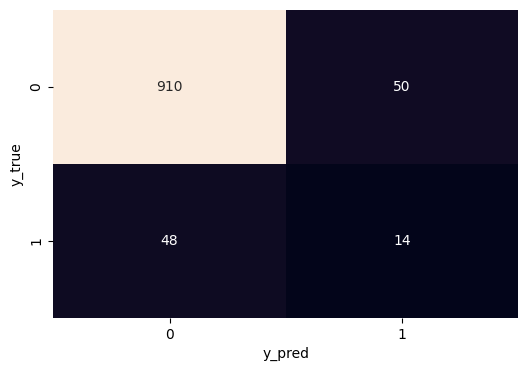

In [17]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,cbar=False,annot=True,fmt='.3g')
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       960
           1       0.22      0.23      0.22        62

    accuracy                           0.90      1022
   macro avg       0.58      0.59      0.59      1022
weighted avg       0.91      0.90      0.90      1022



In [19]:
df_test = df_clean_sk[df_clean_sk['stroke']==0].sample(249)
df_test.shape

(249, 14)

In [20]:
df_test = pd.concat([df_test,df_clean_sk[df_clean_sk['stroke']==1]])
df_test.shape

(498, 14)

In [21]:
X2 = df_test.drop(columns=['stroke'])
y2 = df_test['stroke']

In [22]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.2,random_state=42)

In [23]:
model2 = DecisionTreeClassifier()
model2.fit(X_train2,y_train2)
y_pred2 = model2.predict(X_test2)

In [24]:
print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69        51
           1       0.68      0.65      0.67        49

    accuracy                           0.68       100
   macro avg       0.68      0.68      0.68       100
weighted avg       0.68      0.68      0.68       100



In [26]:
np.linspace(0.1,1,10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [35]:
size, train_score, val_score = learning_curve(DecisionTreeClassifier(random_state=42,max_depth=10)
                                              ,X_train2
                                              ,y_train2
                                              ,train_sizes=np.linspace(0.1,1,10)
                                              ,scoring='recall'
                                              ,cv=5)

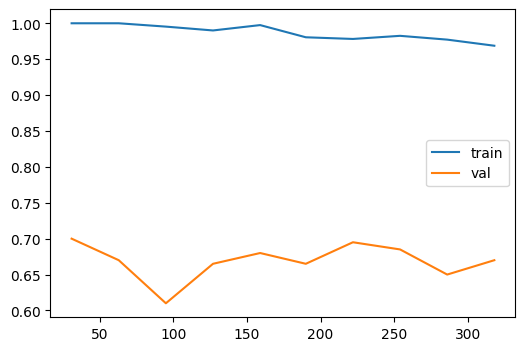

In [36]:
plt.figure(figsize=(6,4))
plt.plot(size,train_score.mean(axis=1),label='train')
plt.plot(size,val_score.mean(axis=1),label='val')
plt.legend()
plt.show()

In [48]:
size, train_score, val_score = learning_curve(LogisticRegression()
                                              ,X_train2
                                              ,y_train2
                                              ,train_sizes=np.linspace(0.1,1,10)
                                              ,scoring='recall'
                                              ,cv=5)

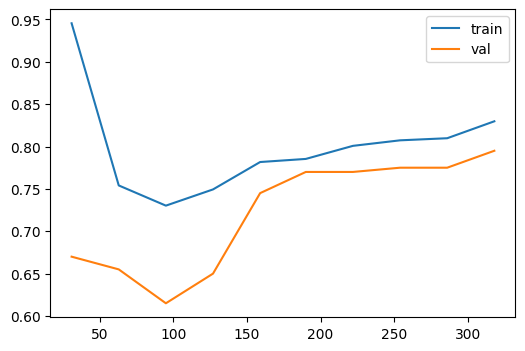

In [49]:
plt.figure(figsize=(6,4))
plt.plot(size,train_score.mean(axis=1),label='train')
plt.plot(size,val_score.mean(axis=1),label='val')
plt.legend()
plt.show()

In [51]:
params = {
    'max_depth':[5,10,15,20]
    ,'criterion':['gini','entropy']
}

In [63]:
grid = GridSearchCV(estimator=DecisionTreeClassifier()
                    ,param_grid=params
                    ,cv=5
                    ,scoring='recall'
                    ,n_jobs=-1)

In [55]:
grid.fit(X_train2,y_train2)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20]},
             scoring='recall')

In [57]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=5)

In [59]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010617,0.004785,0.007635,0.001655,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.550,0.650,0.825,0.725,0.700,0.690,0.090277,1
1,0.008100,0.001111,0.007128,0.001800,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.500,0.625,0.725,0.650,0.725,0.645,0.082765,3
2,0.010891,0.005241,0.008916,0.002629,gini,15,"{'criterion': 'gini', 'max_depth': 15}",0.525,0.575,0.675,0.700,0.650,0.625,0.065192,6
3,0.006282,0.001201,0.006215,0.000812,gini,20,"{'criterion': 'gini', 'max_depth': 20}",0.525,0.600,0.725,0.700,0.675,0.645,0.073144,4
4,0.005851,0.001747,0.005608,0.001015,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.575,0.575,0.650,0.850,0.350,0.600,0.160468,8
5,0.005771,0.000744,0.004718,0.000272,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.575,0.750,0.825,0.600,0.625,0.675,0.096177,2
6,0.006337,0.000322,0.006111,0.000788,entropy,15,"{'criterion': 'entropy', 'max_depth': 15}",0.550,0.675,0.800,0.575,0.575,0.635,0.093005,5
7,0.005836,0.000256,0.006662,0.001255,entropy,20,"{'criterion': 'entropy', 'max_depth': 20}",0.525,0.625,0.800,0.575,0.550,0.615,0.098234,7


In [64]:
grid2 = GridSearchCV(estimator=DecisionTreeClassifier()
                    ,param_grid=params
                    ,cv=5
                    ,scoring='recall'
                    ,n_jobs=-1)

In [68]:
size2,train_score2,val_score2 = learning_curve(grid2
                                               ,X_train2
                                               ,y_train2
                                               ,scoring='recall'
                                               ,train_sizes=np.linspace(0.1,1,10))

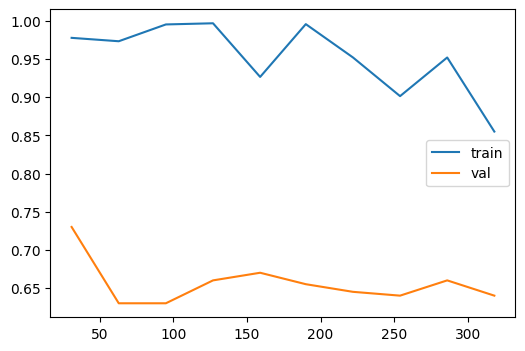

In [66]:
plt.figure(figsize=(6,4))
plt.plot(size2,train_score2.mean(axis=1),label='train')
plt.plot(size2,val_score2.mean(axis=1),label='val')
plt.legend()
plt.show()